In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.tabular.all import *
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install kaggle


In [4]:
# Create the .kaggle directory in Colab
!mkdir -p ~/.kaggle

!cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c bike-sharing-demand


  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 5.73MB/s]


In [7]:
import zipfile

with zipfile.ZipFile('bike-sharing-demand.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [8]:
import os
os.listdir()

['.config',
 'bike-sharing-demand.zip',
 'train.csv',
 'sampleSubmission.csv',
 'test.csv',
 'drive',
 'sample_data']

In [9]:
train_data = pd.read_csv('train.csv')

In [10]:
train_data[400:450]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
400,2011-01-18 16:00:00,1,0,1,2,9.02,11.365,87,12.9980,0,61,61
401,2011-01-18 17:00:00,1,0,1,2,9.02,11.365,82,12.9980,1,124,125
402,2011-01-18 18:00:00,1,0,1,2,9.02,11.365,80,11.0014,1,132,133
403,2011-01-18 19:00:00,1,0,1,2,9.02,11.365,80,8.9981,1,98,99
404,2011-01-18 20:00:00,1,0,1,2,9.02,13.635,87,0.0000,0,83,83
405,2011-01-18 21:00:00,1,0,1,2,9.02,12.120,93,7.0015,0,41,41
406,2011-01-18 22:00:00,1,0,1,2,9.02,12.880,93,6.0032,0,33,33
407,2011-01-18 23:00:00,1,0,1,2,9.02,13.635,93,0.0000,1,19,20
408,2011-01-19 00:00:00,1,0,1,2,9.02,13.635,93,0.0000,0,3,3
409,2011-01-19 01:00:00,1,0,1,3,9.02,11.365,93,8.9981,1,6,7


In [11]:
test_data = pd.read_csv('test.csv')

In [12]:
test_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [13]:
train_data.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [15]:
# Convert 'date' columns to datetime
train_data['date'] = pd.to_datetime(train_data['datetime'])
test_data['date'] = pd.to_datetime(test_data['datetime'])

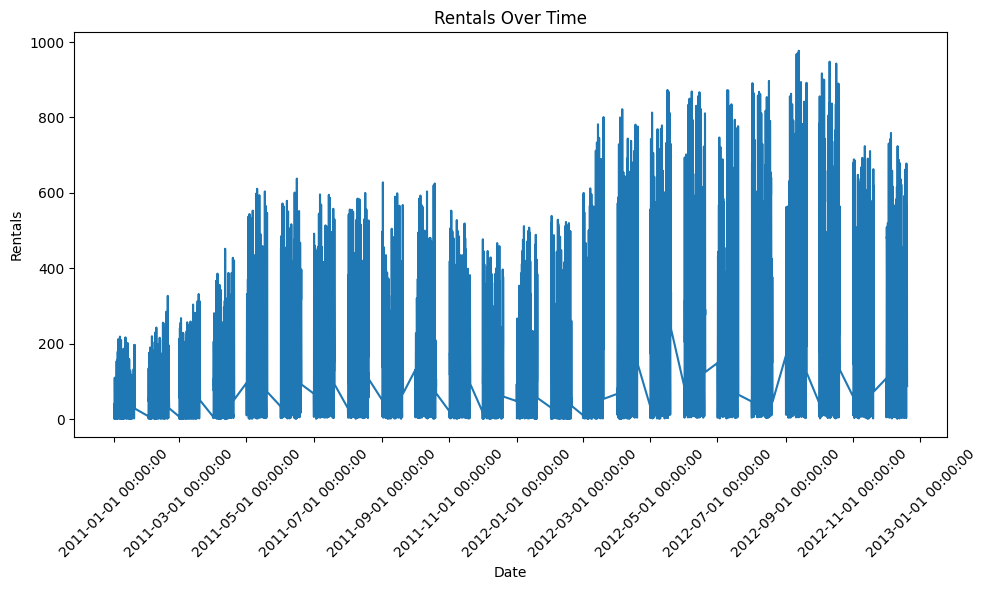

In [16]:
# Plot training data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Line plot of rentals over time
plt.figure(figsize=(10,6))
plt.plot(train_data['date'], train_data['count'])

# Format the x-axis to show fewer date ticks with the format 'YYYY-MM-DD'
locator = mdates.AutoDateLocator(minticks=10, maxticks=15)  # Control the number of date ticks
formatter = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')  # Date format 'YYYY-MM-DD HH:MM:SS'

# Set the locator and formatter for the x-axis
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Add axis labels
plt.xlabel('Date')
plt.ylabel('Rentals')
plt.title('Rentals Over Time')
plt.xticks(rotation=45)

# Tight layout for better spacing
plt.tight_layout()

plt.show()

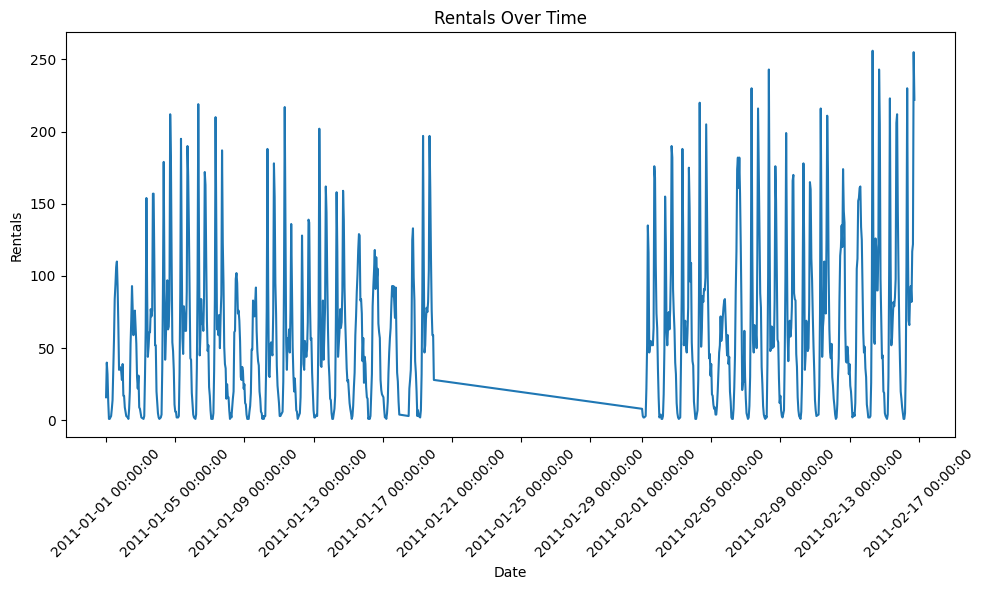

In [17]:
# Plot training data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Line plot of rentals over time
plt.figure(figsize=(10,6))
plt.plot(train_data['date'][:800], train_data['count'][:800])

# Format the x-axis to show fewer date ticks with the format 'YYYY-MM-DD'
locator = mdates.AutoDateLocator(minticks=10, maxticks=15)  # Control the number of date ticks
formatter = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')  # Date format 'YYYY-MM-DD HH:MM:SS'

# Set the locator and formatter for the x-axis
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Add axis labels
plt.xlabel('Date')
plt.ylabel('Rentals')
plt.title('Rentals Over Time')
plt.xticks(rotation=45)

# Tight layout for better spacing
plt.tight_layout()

plt.show()

In [18]:
# Extracting features from datetime
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['day_of_week'] = train_data['date'].dt.weekday  # Monday=0, Sunday=6
train_data['hour'] = train_data['date'].dt.hour

In [19]:
# Extracting features from datetime
test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['day_of_week'] = test_data['date'].dt.weekday  # Monday=0, Sunday=6
test_data['hour'] = test_data['date'].dt.hour

In [20]:
from fastai.tabular.all import *

# Define your categorical and continuous variables
categorical_features = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day_of_week', 'hour']
continuous_features = ['temp', 'atemp', 'humidity', 'windspeed']

# Define your target variable
dep_var = 'count'

# Set preprocessing steps
procs = [Categorify, FillMissing, Normalize]

# Create a Fastai TabularPandas object (it handles train-test split automatically)
to = TabularPandas(train_data, procs, categorical_features, continuous_features, y_names=dep_var, splits=RandomSplitter(valid_pct=0.2)(range_of(train_data)))

# Create DataLoaders for fast training
dls = to.dataloaders(bs=64)


In [21]:
# Add missing column to test set with NaN values
test_data['casual'] = np.nan
test_data['registered'] = np.nan
test_data['count'] = np.nan

In [22]:
# Create data structure
data = train_data.reset_index(drop=True)

In [23]:
# Check for missing values
print("Original Missing Values:")
print(data.isnull().sum())

Original Missing Values:
datetime       0
season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
date           0
year           0
month          0
day_of_week    0
hour           0
dtype: int64


In [24]:
# Use 10% of the training data to allow learning mdoel to run more quickly
train_data = data.sample(frac=0.5)
valid_data = test_data.copy()

print(f"Training Data Shape: {train_data.shape}")
print(f"Validation Data Shape: {valid_data.shape}")


Training Data Shape: (5443, 17)
Validation Data Shape: (6493, 17)


In [25]:
# Identify categorical and continuous variables
categorical_features = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day_of_week', 'hour']
continuous_features = ['temp', 'atemp', 'humidity', 'windspeed']

# Define the target
dep_var = 'count'

# Define the list of categorical and continuous variables
cat_names = categorical_features
cont_names = continuous_features

# Define preprocessing steps
procs = [Categorify, FillMissing, Normalize]

# Create TabularPandas object
to = TabularPandas(train_data, procs, cat_names, cont_names, y_names=dep_var, splits=RandomSplitter(valid_pct=0.2)(range_of(train_data)))

# Create DataLoaders
dls = to.dataloaders(bs=64)

In [26]:
# View the normalized training data
normalized_df = to.train.xs  # xs contains the features (categorical and continuous)

In [27]:
# Define RMSLE
from fastai.metrics import Metric
import torch

class RMSLE(Metric):
    def __init__(self):
        self.reset()

    def reset(self):
        self.sum = 0.0
        self.count = 0

    def accumulate(self, learn):
        pred = torch.clamp(learn.pred, min=0)  # Clamp predictions to avoid negative values
        targ = learn.y
        self.sum += torch.sum((torch.log1p(pred) - torch.log1p(targ))**2).item()
        self.count += targ.shape[0]

    @property
    def value(self):
        return (self.sum / self.count) ** 0.5 if self.count > 0 else None


In [28]:
%time
# Define the learner using Fastai's tabular_learner
# For this regression task where we predict continuous values, rmse is a good metric
learn = tabular_learner(dls, layers=[200, 100], metrics=RMSLE())


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [29]:
%%time
# Train the model for 5 epochs with a learning rate of 1e-2
learn.fit_one_cycle(5, 2e-2)


epoch,train_loss,valid_loss,rmsle,time
0,53762.050781,43035.464844,3.181842,00:07
1,17112.052734,3151.759766,0.641706,00:03
2,6769.189941,2721.705566,0.687819,00:03
3,4118.521973,2175.744385,0.513744,00:03
4,2928.257324,2150.452148,0.477179,00:02


CPU times: user 8.06 s, sys: 198 ms, total: 8.26 s
Wall time: 19.9 s


In [30]:
# # Prepare the test data and ensure all preprocessing steps are applied
# test_dl = learn.dls.test_dl(test_data)

# # Make predictions on the test data
# test_preds, _ = learn.get_preds(dl=test_dl)

# # Prepare submission file
# test_data['count'] = test_preds.flatten().numpy()

In [31]:
# Prepare the test data and ensure all preprocessing steps are applied
test_dl = learn.dls.test_dl(test_data)

# Make predictions on the test data
test_preds, _ = learn.get_preds(dl=test_dl)

# Flatten the predictions and convert to numpy array
preds = test_preds.flatten().numpy()

# Clip negative predictions to zero
preds = np.clip(preds, 0, None)

# Prepare submission file
test_data['count'] = preds

# Save the submission file
test_data[['datetime', 'count']].to_csv('submission.csv', index=False)


In [32]:
# # Make predictions
# preds = learn.get_preds(dl=valid_dl)[0].numpy()

# # Clip negative predictions to zero
# preds = np.clip(preds, 0, None)  # Ensures no negative values

# # Convert to integer if required (some competitions require integer counts)
# preds = preds.astype(int)



In [33]:
# # Save the predictions in the correct format
# submission['count'] = preds
# submission.to_csv('submission.csv', index=False)


In [34]:
# # Create submission file
# submission = test_data[['datetime', 'count']]
# submission.to_csv('submission.csv', index=False)
# print("Submission file 'submission.csv' created successfully.")


In [35]:
import os

# Print the current working directory
print(os.getcwd())

/content
